# Car_Price_Prediction

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

import warnings
warnings.filterwarnings('ignore')

## Data collection & Analysis

In [2]:
df=pd.read_csv("Car details v3.csv")

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


## Exploring Data & Analysing Data

In [4]:
df.shape

(8128, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 762.1+ KB


In [6]:
# Numerical Statistics
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


## Data Cleaning and Transformation

In [7]:
# Missing values
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

<AxesSubplot:>

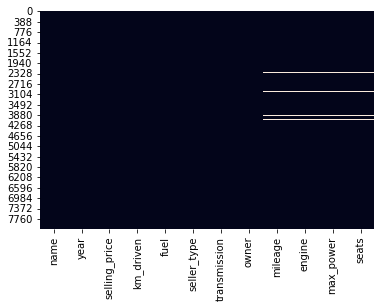

In [8]:
import seaborn as sns 
sns.heatmap(df.isnull(),cbar=False)

In [9]:
# Check Duplicate values
df.duplicated().sum()

1202

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(6926, 12)

In [12]:
for col in df.columns:
    print('Unique values of ' + col)
    print(df[col].unique())
    print('=========================\n')

Unique values of name
['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']

Unique values of year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2003 2019 2008 2020 1999 2000 1983 2004 1996 1994 1995 1998 1997
 1991]

Unique values of selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000    70000   730000   650000   330000
   366000  1149000   425000  2100000   925000   675000   819999   390000
  1500000   700000  1450000  1090000   850000  1650000  1750000  1590000
  1689999  1425000   265000   190000   630000   540000   448000   745000
  1025000   235000  1700000    50000  1200000   6100

## Imputation 

In [13]:
def get_brand_name(df):
    df = df.split(' ')[0]
    return df.strip(' ')

In [14]:
get_brand_name('Honda City 2017-2020 EXi')

'Honda'

In [15]:
df['name'] = df['name'].apply(get_brand_name)

In [16]:
df['name'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

#  Data Cleaning of Mileage col :

In [17]:
df.mileage.unique()

array(['23.4 kmpl', '21.14 kmpl', '17.7 kmpl', '23.0 kmpl', '16.1 kmpl',
       '20.14 kmpl', '17.3 km/kg', '23.59 kmpl', '20.0 kmpl',
       '19.01 kmpl', '17.3 kmpl', '19.3 kmpl', nan, '18.9 kmpl',
       '18.15 kmpl', '24.52 kmpl', '19.7 kmpl', '22.54 kmpl', '21.0 kmpl',
       '25.5 kmpl', '26.59 kmpl', '21.5 kmpl', '20.3 kmpl', '21.4 kmpl',
       '24.7 kmpl', '18.2 kmpl', '16.8 kmpl', '24.3 kmpl', '14.0 kmpl',
       '18.6 kmpl', '33.44 km/kg', '23.95 kmpl', '17.0 kmpl',
       '20.63 kmpl', '13.93 kmpl', '16.0 kmpl', '17.8 kmpl', '18.5 kmpl',
       '12.55 kmpl', '12.99 kmpl', '14.8 kmpl', '13.5 kmpl', '26.0 kmpl',
       '20.65 kmpl', '27.3 kmpl', '11.36 kmpl', '17.68 kmpl',
       '14.28 kmpl', '18.53 kmpl', '14.84 kmpl', '21.12 kmpl',
       '20.36 kmpl', '21.27 kmpl', '18.16 kmpl', '22.0 kmpl', '25.1 kmpl',
       '20.51 kmpl', '21.66 kmpl', '25.2 kmpl', '22.9 kmpl', '16.02 kmpl',
       '20.54 kmpl', '22.77 kmpl', '15.71 kmpl', '23.1 kmpl',
       '19.02 kmpl', '19.81 kmpl'

In [18]:
df["mileage"].str.split("k")

0        [23.4 , mpl]
1       [21.14 , mpl]
2        [17.7 , mpl]
3        [23.0 , mpl]
4        [16.1 , mpl]
            ...      
8121     [18.9 , mpl]
8122    [22.54 , mpl]
8123     [18.5 , mpl]
8124     [16.8 , mpl]
8125     [19.3 , mpl]
Name: mileage, Length: 6926, dtype: object

In [19]:
df["mileage"].str.split("k").str[0]

0        23.4 
1       21.14 
2        17.7 
3        23.0 
4        16.1 
         ...  
8121     18.9 
8122    22.54 
8123     18.5 
8124     16.8 
8125     19.3 
Name: mileage, Length: 6926, dtype: object

In [20]:
df["mileage"]=df["mileage"].str.split("k").str[0]

In [21]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248 CC,74 bhp,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,103.52 bhp,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497 CC,78 bhp,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396 CC,90 bhp,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298 CC,88.2 bhp,5.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6926 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6926 non-null   object 
 1   year           6926 non-null   int64  
 2   selling_price  6926 non-null   int64  
 3   km_driven      6926 non-null   int64  
 4   fuel           6926 non-null   object 
 5   seller_type    6926 non-null   object 
 6   transmission   6926 non-null   object 
 7   owner          6926 non-null   object 
 8   mileage        6718 non-null   object 
 9   engine         6718 non-null   object 
 10  max_power      6721 non-null   object 
 11  seats          6718 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 703.4+ KB


In [23]:
df["mileage"]=df["mileage"].astype(float)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6926 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6926 non-null   object 
 1   year           6926 non-null   int64  
 2   selling_price  6926 non-null   int64  
 3   km_driven      6926 non-null   int64  
 4   fuel           6926 non-null   object 
 5   seller_type    6926 non-null   object 
 6   transmission   6926 non-null   object 
 7   owner          6926 non-null   object 
 8   mileage        6718 non-null   float64
 9   engine         6718 non-null   object 
 10  max_power      6721 non-null   object 
 11  seats          6718 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 703.4+ KB


# data Imputation of mileage col

In [25]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          208
engine           208
max_power        205
seats            208
dtype: int64

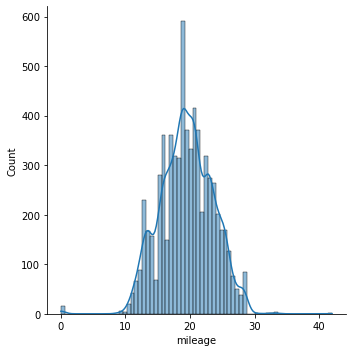

In [26]:
sns.displot(df["mileage"],kde=True)

In [27]:
df["mileage"].fillna(df["mileage"].mean(),inplace=True)

In [28]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage            0
engine           208
max_power        205
seats            208
dtype: int64

# Data Cleaning of Engine col

In [29]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248 CC,74 bhp,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,103.52 bhp,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497 CC,78 bhp,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396 CC,90 bhp,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298 CC,88.2 bhp,5.0


In [30]:
df.engine.unique()

array(['1248 CC', '1498 CC', '1497 CC', '1396 CC', '1298 CC', '1197 CC',
       '1061 CC', '796 CC', '1364 CC', '1399 CC', '1461 CC', '993 CC',
       nan, '1198 CC', '1199 CC', '998 CC', '1591 CC', '2179 CC',
       '1368 CC', '2982 CC', '2494 CC', '2143 CC', '2477 CC', '1462 CC',
       '2755 CC', '1968 CC', '1798 CC', '1196 CC', '1373 CC', '1598 CC',
       '1998 CC', '1086 CC', '1194 CC', '1172 CC', '1405 CC', '1582 CC',
       '999 CC', '2487 CC', '1999 CC', '3604 CC', '2987 CC', '1995 CC',
       '1451 CC', '1969 CC', '2967 CC', '2497 CC', '1797 CC', '1991 CC',
       '2362 CC', '1493 CC', '1599 CC', '1341 CC', '1794 CC', '799 CC',
       '1193 CC', '2696 CC', '1495 CC', '1186 CC', '1047 CC', '2498 CC',
       '2956 CC', '2523 CC', '1120 CC', '624 CC', '1496 CC', '1984 CC',
       '2354 CC', '814 CC', '793 CC', '1799 CC', '936 CC', '1956 CC',
       '1997 CC', '1499 CC', '1948 CC', '2997 CC', '2489 CC', '2499 CC',
       '2609 CC', '2953 CC', '1150 CC', '1994 CC', '1388 CC', '152

In [31]:
df["engine"]=df["engine"].str.split("C").str[0]

In [32]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74 bhp,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52 bhp,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78 bhp,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90 bhp,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.2 bhp,5.0


In [33]:
df["engine"]=df["engine"].astype(float)

In [34]:
# df.info()

# Data imputation of Engine col

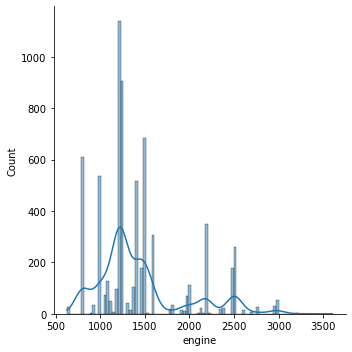

In [35]:
sns.displot(df["engine"],kde=True)

In [36]:
df["engine"].fillna(df["engine"].median(),inplace=True)

In [37]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage            0
engine             0
max_power        205
seats            208
dtype: int64

# Data Cleaning of max_power 

In [38]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74 bhp,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52 bhp,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78 bhp,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90 bhp,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2 bhp,5.0


In [39]:
df["max_power"]=df["max_power"].str.split("b").str[0]

In [40]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [41]:
df["max_power"].unique()

array(['74 ', '103.52 ', '78 ', '90 ', '88.2 ', '81.86 ', '57.5 ', '37 ',
       '67.1 ', '68.1 ', '108.45 ', '60 ', '73.9 ', nan, '67 ', '82 ',
       '88.5 ', '46.3 ', '88.73 ', '64.1 ', '98.6 ', '88.8 ', '83.81 ',
       '83.1 ', '47.3 ', '73.8 ', '34.2 ', '35 ', '81.83 ', '40.3 ',
       '121.3 ', '138.03 ', '160.77 ', '117.3 ', '116.3 ', '83.14 ',
       '67.05 ', '168.5 ', '100 ', '120.7 ', '98.63 ', '175.56 ',
       '103.25 ', '171.5 ', '100.6 ', '174.33 ', '187.74 ', '170 ',
       '78.9 ', '88.76 ', '86.8 ', '108.495 ', '108.62 ', '93.7 ',
       '103.6 ', '98.59 ', '189 ', '67.04 ', '68.05 ', '58.2 ', '82.85 ',
       '81.80 ', '73 ', '120 ', '94.68 ', '160 ', '65 ', '155 ', '69.01 ',
       '126.32 ', '138.1 ', '83.8 ', '126.2 ', '98.96 ', '62.1 ', '86.7 ',
       '188 ', '214.56 ', '177 ', '280 ', '148.31 ', '254.79 ', '190 ',
       '177.46 ', '204 ', '141 ', '117.6 ', '241.4 ', '282 ', '150 ',
       '147.5 ', '108.5 ', '103.5 ', '183 ', '181.04 ', '157.7 ',
       '164.

In [42]:
df["max_power"] = df["max_power"].replace('','nan').astype(float)

# Data Imputation of Max_power

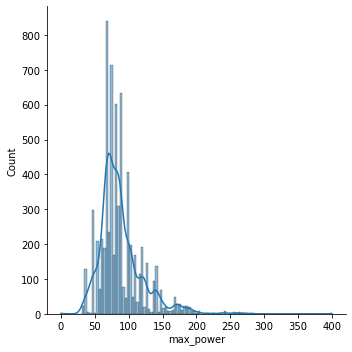

In [43]:
sns.displot(df["max_power"],kde=True)

In [44]:
df["max_power"].mean()

87.72691889880849

In [45]:
df["max_power"].median()

81.83

In [46]:
df["max_power"].fillna(df["max_power"].median(),inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6926 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6926 non-null   object 
 1   year           6926 non-null   int64  
 2   selling_price  6926 non-null   int64  
 3   km_driven      6926 non-null   int64  
 4   fuel           6926 non-null   object 
 5   seller_type    6926 non-null   object 
 6   transmission   6926 non-null   object 
 7   owner          6926 non-null   object 
 8   mileage        6926 non-null   float64
 9   engine         6926 non-null   float64
 10  max_power      6926 non-null   float64
 11  seats          6718 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 703.4+ KB


In [48]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage            0
engine             0
max_power          0
seats            208
dtype: int64

In [49]:
df.seats.unique()

array([ 5.,  4., nan,  7.,  8.,  6.,  9., 10., 14.,  2.])

In [50]:
df["seats"].fillna(df["seats"].mode()[0],inplace=True)

In [51]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [52]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [53]:
pd.crosstab(df['seller_type'],df['fuel']).apply(lambda r:round((r/r.sum())*100,1), axis=1)

fuel,CNG,Diesel,LPG,Petrol
seller_type,,,,
Dealer,0.0,59.6,0.3,40.1
Individual,0.9,53.8,0.6,44.7
Trustmark Dealer,0.0,11.1,0.0,88.9


In [54]:
pd.crosstab(df['seller_type'],df['transmission']).apply(lambda r:round((r/r.sum())*100,1), axis=1)

transmission,Automatic,Manual
seller_type,,
Dealer,25.3,74.7
Individual,6.5,93.5
Trustmark Dealer,37.0,63.0


In [55]:
pd.crosstab(df['seller_type'],df['owner']).apply(lambda r:round((r/r.sum())*100,1), axis=1)

owner,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
seller_type,,,,,
Dealer,85.5,0.0,13.2,0.7,0.6
Individual,58.5,2.7,30.3,0.0,8.6
Trustmark Dealer,88.9,0.0,11.1,0.0,0.0


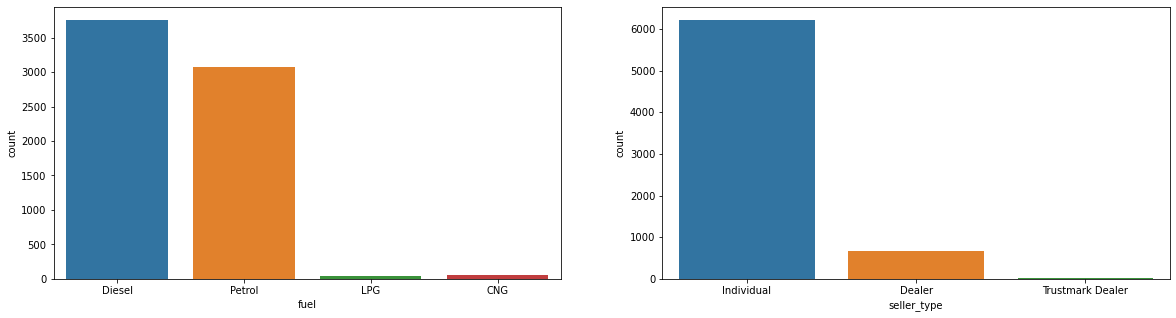

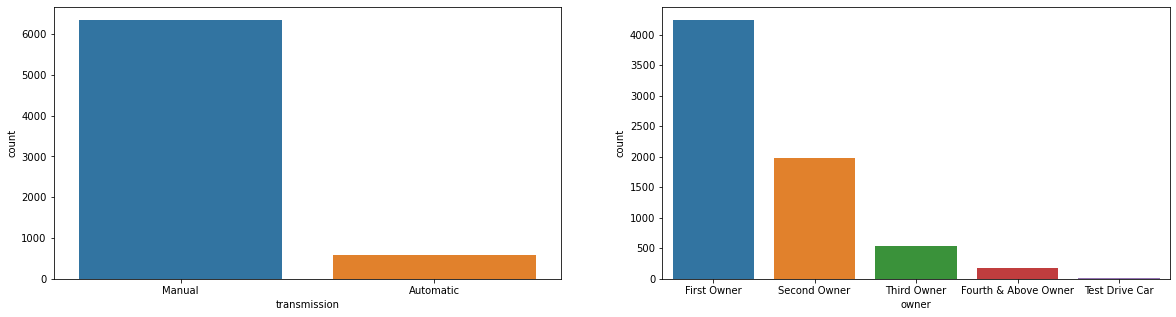

In [56]:
cat_cols = ['fuel','seller_type','transmission','owner']
i=0
while i < 4:
    fig = plt.figure(figsize=[20,5])
    
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1
    
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1
    
    plt.show()

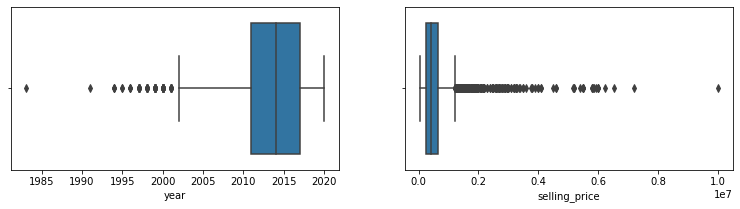

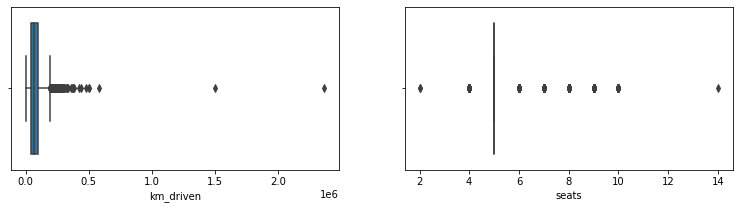

In [57]:
num_cols = ['year','selling_price','km_driven','seats']
i=0
while i < 4:
    fig = plt.figure(figsize=[20,3])
    
    plt.subplot(1,3,1)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    
    plt.subplot(1,3,2)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    
    plt.show()

# Data Encoding 

In [58]:
unique_cars = df['name'].unique()
unique_car_count = len(unique_cars)
print(unique_car_count)

32


In [59]:
object = ['name']
for names in object:
    count = df[names].value_counts()
    print(count)

Maruti           2165
Hyundai          1267
Mahindra          723
Tata              647
Honda             362
Ford              361
Toyota            357
Chevrolet         216
Renault           206
Volkswagen        174
Nissan             73
Skoda              70
Datsun             57
BMW                47
Mercedes-Benz      46
Fiat               44
Audi               33
Jeep               22
Mitsubishi         11
Volvo               9
Jaguar              8
Isuzu               4
Ambassador          4
Force               4
Kia                 3
Land                3
Daewoo              3
MG                  3
Ashok               1
Lexus               1
Opel                1
Peugeot             1
Name: name, dtype: int64


In [60]:
df['name'].replace(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,
                                                                            21,22,23,24,25,26,27,28,29,30,31,32],inplace=True)

In [61]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [62]:
df['fuel'].replace(['Diesel', 'Petrol', 'LPG', 'CNG'],[1, 2, 3, 4],inplace=True)

In [63]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [64]:
df['seller_type'].replace(['Individual', 'Dealer', 'Trustmark Dealer'],[1, 2, 3],inplace=True)

In [65]:
df['transmission'].unique() 

array(['Manual', 'Automatic'], dtype=object)

In [66]:
df['transmission'].replace(['Manual', 'Automatic'],[1, 2],inplace=True)

In [67]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [68]:
df['owner'].replace(['First Owner','Second Owner','Third Owner','Fourth & Above Owner','Test Drive Car'],[1, 2, 3, 4, 5],inplace=True)

In [69]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1,2014,450000,145500,1,1,1,1,23.40,1248.0,74.00,5.0
1,2,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0
2,3,2006,158000,140000,2,1,1,3,17.70,1497.0,78.00,5.0
3,4,2010,225000,127000,1,1,1,1,23.00,1396.0,90.00,5.0
4,1,2007,130000,120000,2,1,1,1,16.10,1298.0,88.20,5.0


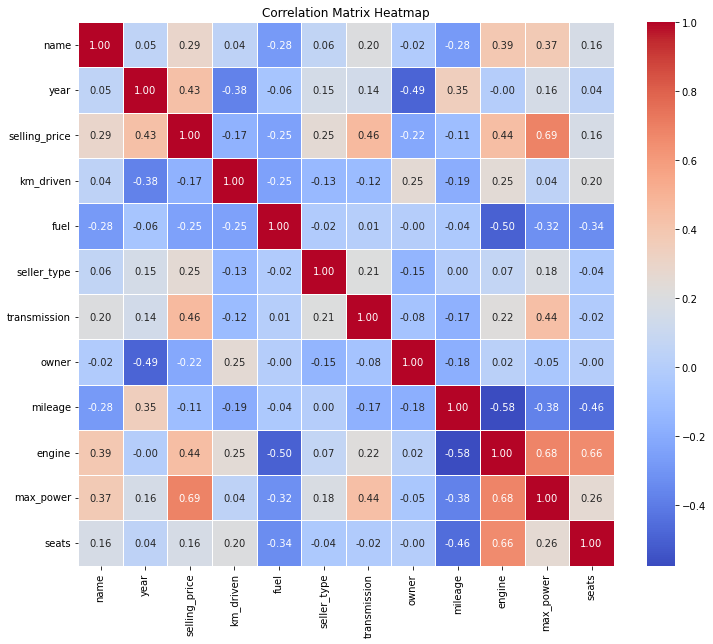

In [70]:
# Create a correlation matrix
correlation_matrix = df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Spliting of the dataset

In [71]:
y=df["selling_price"] #Target 

In [72]:
x=df.drop(columns="selling_price") #feat

In [73]:
x

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1,2014,145500,1,1,1,1,23.40,1248.0,74.00,5.0
1,2,2014,120000,1,1,1,2,21.14,1498.0,103.52,5.0
2,3,2006,140000,2,1,1,3,17.70,1497.0,78.00,5.0
3,4,2010,127000,1,1,1,1,23.00,1396.0,90.00,5.0
4,1,2007,120000,2,1,1,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8121,1,2013,50000,2,1,1,2,18.90,998.0,67.10,5.0
8122,4,2014,80000,1,1,1,2,22.54,1396.0,88.73,5.0
8123,4,2013,110000,2,1,1,1,18.50,1197.0,82.85,5.0
8124,4,2007,119000,1,1,1,4,16.80,1493.0,110.00,5.0


In [74]:
y

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8121    260000
8122    475000
8123    320000
8124    135000
8125    382000
Name: selling_price, Length: 6926, dtype: int64

## Splitting the data into Training data & Testing data

In [75]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2, random_state=42) # 20 % Testing & 80 % as training 

In [76]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

import warnings
warnings.filterwarnings('ignore')

## Model Fitting

In [81]:
R2=[]
Algorithms=['LinearRegression','RandomForestRegressor','DecisionTreeRegressor','KNeighborsRegressor']

In [77]:
regression = LinearRegression()
regression.fit(X_train, Y_train)

predy = regression.predict(X_test)

print('Train_Score:',regression.score(X_train, Y_train))
print('Test_Score:',regression.score(X_test, Y_test))
print('Mean_Squared_Error:',mean_squared_error(Y_test,predy))
print('Mean_Absolute_Error:',sqrt(mean_squared_error(Y_test,predy)))
print('r_squared:',r2_score(Y_test,predy))

Train_Score: 0.6271030303085956
Test_Score: 0.5679515862875126
Mean_Squared_Error: 94757561466.51549
Mean_Absolute_Error: 307827.1616776458
r_squared: 0.5679515862875126


In [78]:
dt = DecisionTreeRegressor(max_depth=10)
dt.fit(X_train, Y_train)

predy = dt.predict(X_test)

print('Train_Score:',dt.score(X_train, Y_train))
print('Test_Score:',dt.score(X_test, Y_test))
print('Mean_Squared_Error:',mean_squared_error(Y_test,predy))
print('Mean_Absolute_Error:',sqrt(mean_squared_error(Y_test,predy)))
print('r_squared:',r2_score(Y_test,predy))

Train_Score: 0.973726802608461
Test_Score: 0.8958575100891983
Mean_Squared_Error: 22840700430.312763
Mean_Absolute_Error: 151131.40120541715
r_squared: 0.8958575100891983


In [79]:
rf = RandomForestRegressor(n_estimators = 150)
rf.fit(X_train, Y_train)

predy = rf.predict(X_test)

print('Train_Score:',rf.score(X_train, Y_train))
print('Test_Score:',rf.score(X_test, Y_test))
print('Mean_Squared_Error:',mean_squared_error(Y_test,predy))
print('Mean_Absolute_Error:',sqrt(mean_squared_error(Y_test,predy)))
print('r_squared:',r2_score(Y_test,predy))

Train_Score: 0.9854156617493417
Test_Score: 0.9268237156116766
Mean_Squared_Error: 16049141822.407206
Mean_Absolute_Error: 126685.20759112804
r_squared: 0.9268237156116766


In [80]:
knn = KNeighborsRegressor()
knn.fit(X_train, Y_train)

predy = knn.predict(X_test)

print('Train_Score:',knn.score(X_train, Y_train))
print('Test_Score:',knn.score(X_test, Y_test))
print('Mean_Squared_Error:',mean_squared_error(Y_test,predy))
print('Mean_Absolute_Error:',sqrt(mean_squared_error(Y_test,predy)))
print('r_squared:',r2_score(Y_test,predy))

Train_Score: 0.6707602630493223
Test_Score: 0.41070369091210013
Mean_Squared_Error: 129245425878.46898
Mean_Absolute_Error: 359507.1986462427
r_squared: 0.41070369091210013


# Building a Predictive System

In [100]:
input_data_model = pd.DataFrame(
    [[9,2013,25000,1,1,1,1,23.57,1396.0,70.00,5.0]],
    columns = ['name','year','km_driven','fuel','seller_type','transmission','owner','mileage','engine','max_power','seats']
)

In [101]:
input_data_model

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,9,2013,25000,1,1,1,1,23.57,1396.0,70.0,5.0


In [102]:
rf.predict(input_data_model)

array([288353.33333333])

# Finding Cars by cost

In [82]:
# Ask the customer for their budget range
min_budget = float(input("Enter the minimum budget: "))
max_budget = float(input("Enter the maximum budget: "))

# Filter the dataset to find cars within the budget range
filtered_cars = df[(df['selling_price'] >= min_budget) & (df['selling_price'] <= max_budget)]

# Check if there are any cars in the range
if not filtered_cars.empty:
    print(f"\nCars available within the budget range {min_budget} to {max_budget}:")
    print(filtered_cars)
    
    # Additional statistics (optional)
    print(f"\nTotal cars available: {filtered_cars.shape[0]}")
    print(f"Average price: {filtered_cars['selling_price'].mean():.2f}")
else:
    print(f"\nNo cars found within the budget range {min_budget} to {max_budget}.")

Enter the minimum budget: 900000
Enter the maximum budget: 1000000

Cars available within the budget range 900000.0 to 1000000.0:
      name  year  selling_price  km_driven  fuel  seller_type  transmission  \
21       3  2017         950000      50000     1            1             1   
42       3  2018         925000      28900     2            2             1   
56       5  2016         950000      99000     1            2             1   
149     18  2010         975000      72200     2            2             2   
230      6  2018         910000      15000     2            1             1   
...    ...   ...            ...        ...   ...          ...           ...   
7853     3  2017         950000      15000     2            1             2   
7877     4  2017         990000      20000     2            1             2   
7883     6  2018         925000      50699     1            2             1   
7918     6  2018         990000      60000     1            1             1   
8